In [18]:
# LIBRARIES
import time
from tpot import TPOTClassifier
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lazypredict.Supervised import LazyClassifier, LazyRegressor 
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, confusion_matrix  

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [2]:
# READ CSV AND INDENTIFY NUMBERS VERSUS STRINGS
df=pd.read_csv(r'term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
# SEE DATA
df.describe()



,age,balance,day,duration,campaign
count,40000.00,40000.00,40000.00,40000.00,40000.00
mean,40.54,1274.28,16.02,254.82,2.88
std,9.64,2903.77,8.28,259.37,3.24
min,19.00,-8019.00,1.00,0.00,1.00
25%,33.00,54.00,8.00,100.00,1.00
50%,39.00,407.00,17.00,175.00,2.00
75%,48.00,1319.00,21.00,313.00,3.00
max,95.00,102127.00,31.00,4918.00,63.00


In [4]:
# CONVERT STRINGS TO NUMBER
df_dummies=pd.get_dummies(df)
# DROP THE LAST COLUM, JUST LEAVE THE HAPPY COUSTUMERS
df2=df_dummies.drop(['y_no'], axis=1)
df2

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_yes
0,58,2143,5,261,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39996,30,3340,3,238,3,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
39997,54,200,3,170,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
39998,34,1047,3,342,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# COMPARE MODEL WITH LAZZY PREDIC
X = df2.iloc[:,:-1]
print(X)
y= df2.iloc[:,-1]
print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

       age  balance  day  duration  campaign  job_admin  job_blue-collar  \
0       58     2143    5       261         1          0                0   
1       44       29    5       151         1          0                0   
2       33        2    5        76         1          0                0   
3       47     1506    5        92         1          0                1   
4       33        1    5       198         1          0                0   
...    ...      ...  ...       ...       ...        ...              ...   
39995   53      395    3       107         1          0                0   
39996   30     3340    3       238         3          0                0   
39997   54      200    3       170         1          1                0   
39998   34     1047    3       342         1          0                0   
39999   38     1442    3       113         1          0                0   

       job_entrepreneur  job_housemaid  job_management  ...  month_aug  \
0            

 90%|██████████████████████████████████████▌    | 26/29 [00:56<00:04,  1.65s/it]

[18:26:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████| 29/29 [00:57<00:00,  1.99s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.88               0.83     0.83      0.90   
LinearDiscriminantAnalysis         0.93               0.70     0.70      0.93   
DecisionTreeClassifier             0.91               0.70     0.70      0.92   
LGBMClassifier                     0.94               0.68     0.68      0.93   
XGBClassifier                      0.93               0.68     0.68      0.93   
BaggingClassifier                  0.93               0.66     0.66      0.93   
AdaBoostClassifier                 0.93               0.64     0.64      0.92   
LabelPropagation                   0.92               0.63     0.63      0.91   
LabelSpreading                     0.92               0.63     0.63      0.91   
SGDClassifier                      0.93               0.63     0.63      0.92   
ExtraTreeClassifier         

In [8]:
# GENETIC ALGORITHMS 
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9385

Generation 2 - Current best internal CV score: 0.9385

Generation 3 - Current best internal CV score: 0.9385

Generation 4 - Current best internal CV score: 0.9390000000000001

Generation 5 - Current best internal CV score: 0.9390000000000001

Best pipeline: ExtraTreesClassifier(FastICA(input_matrix, tol=0.25), bootstrap=True, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=3, min_samples_split=15, n_estimators=100)
0.9356


# Feature importance based on mean decrease in impurity with a forest of trees

In [6]:
#THREE

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)


start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.005 seconds


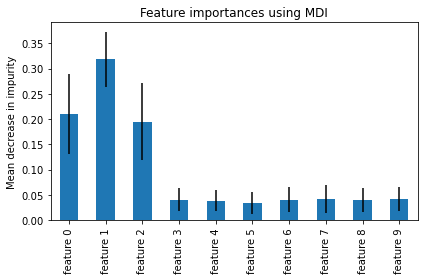

In [7]:
#feature importance
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [8]:
# BEST FEATURES
# EXTRAC THE BEST FEATURES 
new_X_train=X_train[:,0:2]
new_X_test=X_test[:,0:2]

In [9]:
#NearestCentroid WITH BEST FETURES
clf = NearestCentroid()
clf.fit(new_X_train, y_train)
NearestCentroid()
clf.score(new_X_test,y_test)

0.74

In [10]:
# LinearDiscriminantAnalysis WITH BEST FETURES
clf = LinearDiscriminantAnalysis()
clf.fit(new_X_train, y_train)
LinearDiscriminantAnalysis()
clf.score(new_X_test,y_test)

0.744

In [19]:
# TUNNING PARAMETERS
model = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(new_X_test, y_test)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.743
Config: {'solver': 'svd'}


# CONCLUSIONS


# Goal:
The proposed Linear Discriminant Analysis method allows predicting whether customers are 74% happy. Multiple alternatives were proposed to predict customer satisfaction as can be seen in cell number [5].

The Linear Discriminant Analysis was chosen over the other proposals, due to the area under the curve, and the computational cost. The area under the curve allows us to observe how well it predicts satisfied and dissatisfied customers, giving an assurance that the proposed method is not over training and will have good predictions in the future. And the computational time allows the export of the model to an integrated electronic or in the cloud.

In the same way, the search for the most relevant characteristics was carried out so that in the future no garbage or noise-generating information would have to be collected, but rather the most relevant characteristics that allow the prediction of satisfied customers. The most relevant features are age balance and day.

Finally, an adjustment of the hyperparameters of the method was made to increase the prediction precision, however, the increase in the prediction was by decimals. Therefore, it is proposed to use the method with the basic parameters, which will avoid generating unnecessary calculations in the future.
